<a href="https://colab.research.google.com/github/AbhinavDL/DeepLearning/blob/main/HumanActivityRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Importing required packages
import sys
import os
import re
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, Sequential, Input, Model
import datetime

!pip install ann_visualizer
%load_ext tensorboard

# Fetching Datasets

In [ ]:
#@title Fetching MHealth
# MHEALTH
! wget http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
! unzip MHEALTHDATASET.zip

--2021-02-25 13:05:22--  http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75567983 (72M) [application/x-httpd-php]
Saving to: ‘MHEALTHDATASET.zip.2’

MHEALTHDATASET.zip. 100%[===================>]  72.07M  35.1MB/s    in 2.1s    

2021-02-25 13:05:25 (35.1 MB/s) - ‘MHEALTHDATASET.zip.2’ saved [75567983/75567983]

Archive:  MHEALTHDATASET.zip
replace MHEALTHDATASET/mHealth_subject1.log? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
  #@title Packages
!apt install poppler-utils

Reading package lists... 76%
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


## Dataset Description

In [ ]:
#@title MHealth Dataset Readme
! cat MHEALTHDATASET/README.txt


*************************************************** mHealth dataset **********************************************************

Authors: Oresti Ba�os, Rafael Garcia, Alejandro Saez
Date: 22/10/2013
Institution: University of Granada (UGR) 
Department: Department of Computer Architecture and Computer Technology.
Contact: oresti@ugr.es (oresti.bl@gmail.com)

---------------------------------------------------------------------------------------------------------------------------------------------
NOTE: if you use this dataset please cite the following work

Banos, O., Garcia, R., Holgado-Terriza, J.A., Damas, M., Pomares, H., Rojas, I., Saez, A., Villalonga, C.: 
mHealthDroid: a novel framework for agile development of mobile health applications. 
In: Proceedings of the 6th International Work-conference on Ambient Assisted Living an Active Ageing (IWAAL 2014), Belfast, United Kingdom, December 2-5 (2014)

Insightful figures and descriptions are presented within this work.
-------------

In [ ]:
#@title -

!pdftotext PAMAP2_Dataset/readme.pdf  

I/O Error: Couldn't open file 'PAMAP2_Dataset/readme.pdf': No such file or directory.


## Importing Dataset

In [ ]:
#@title Inspecting MHealth log File
!head -n 10 MHEALTHDATASET/mHealth_subject1.log

-9.8184	0.009971	0.29563	0.0041863	0.0041863	2.1849	-9.6967	0.63077	0.1039	-0.84053	-0.68762	-0.37	-0.36327	0.29963	-8.6499	-4.5781	0.18776	-0.44902	-1.0103	0.034483	-2.35	-1.6102	-0.030899	0
-9.8489	0.52404	0.37348	0.0041863	0.016745	2.3876	-9.508	0.68389	0.085343	-0.83865	-0.68369	-0.19799	-0.18151	0.58298	-8.6275	-4.3198	0.023595	-0.44902	-1.0103	0.034483	-2.1632	-0.88254	0.32657	0
-9.6602	0.18185	0.43742	0.016745	0.037677	2.4086	-9.5674	0.68113	0.085343	-0.83865	-0.68369	-0.37417	0.18723	0.43851	-8.5055	-4.2772	0.27572	-0.44902	-1.0103	0.034483	-1.6175	-0.16562	-0.030693	0
-9.6507	0.21422	0.24033	0.07954	0.11722	2.1814	-9.4301	0.55031	0.085343	-0.83865	-0.68369	-0.017271	0.18366	0.57571	-8.6279	-4.3163	0.36752	-0.45686	-1.0082	0.025862	-1.0771	0.0069451	-0.38262	0
-9.703	0.30389	0.31156	0.22187	0.20513	2.4173	-9.3889	0.71098	0.085343	-0.83865	-0.68369	-0.37439	-0.54671	0.44586	-8.7008	-4.1459	0.40729	-0.45686	-1.0082	0.025862	-0.53684	0.1759	-1.0955	0
-9.6511	0.23261	0.42094	0.1548

In [ ]:
#@title MHealth Files List
for i in os.listdir('MHEALTHDATASET/'):
  if not re.search('README', i):
    print(i)

mHealth_subject5.log
mHealth_subject7.log
mHealth_subject8.log
mHealth_subject6.log
mHealth_subject2.log
mHealth_subject1.log
mHealth_subject4.log
mHealth_subject10.log
mHealth_subject3.log
mHealth_subject9.log


In [ ]:
#@title Converting one subject to DataFrame
mHealth = pd.read_csv('MHEALTHDATASET/mHealth_subject3.log', header=None, sep='\t').loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]].rename(columns={5:"alX", 6:"alY", 7:"alZ", 8:"glX", 9:"glY", 10:"glZ", 14:"arX",15:"arY", 16:"arZ", 17:"grX", 18:"grY", 19:"grZ", 23:"Output"})
mHealth.head(5)

alX     alY      alZ      glX  ...      grX      grY      grZ  Output
0 -0.18848 -9.8425  0.90183  0.55659  ... -0.75490 -0.22998  0.78233       0
1 -0.36263 -9.7832  0.89263  0.55659  ... -0.75490 -0.22998  0.78233       0
2 -0.24823 -9.8010  1.09080  0.57885  ... -0.75490 -0.22998  0.78233       0
3 -0.25027 -9.6730  1.01380  0.57885  ... -0.75490 -0.22998  0.78233       0
4 -0.20668 -9.9102  1.05450  0.57885  ... -0.75294 -0.22998  0.76293       0

[5 rows x 13 columns]

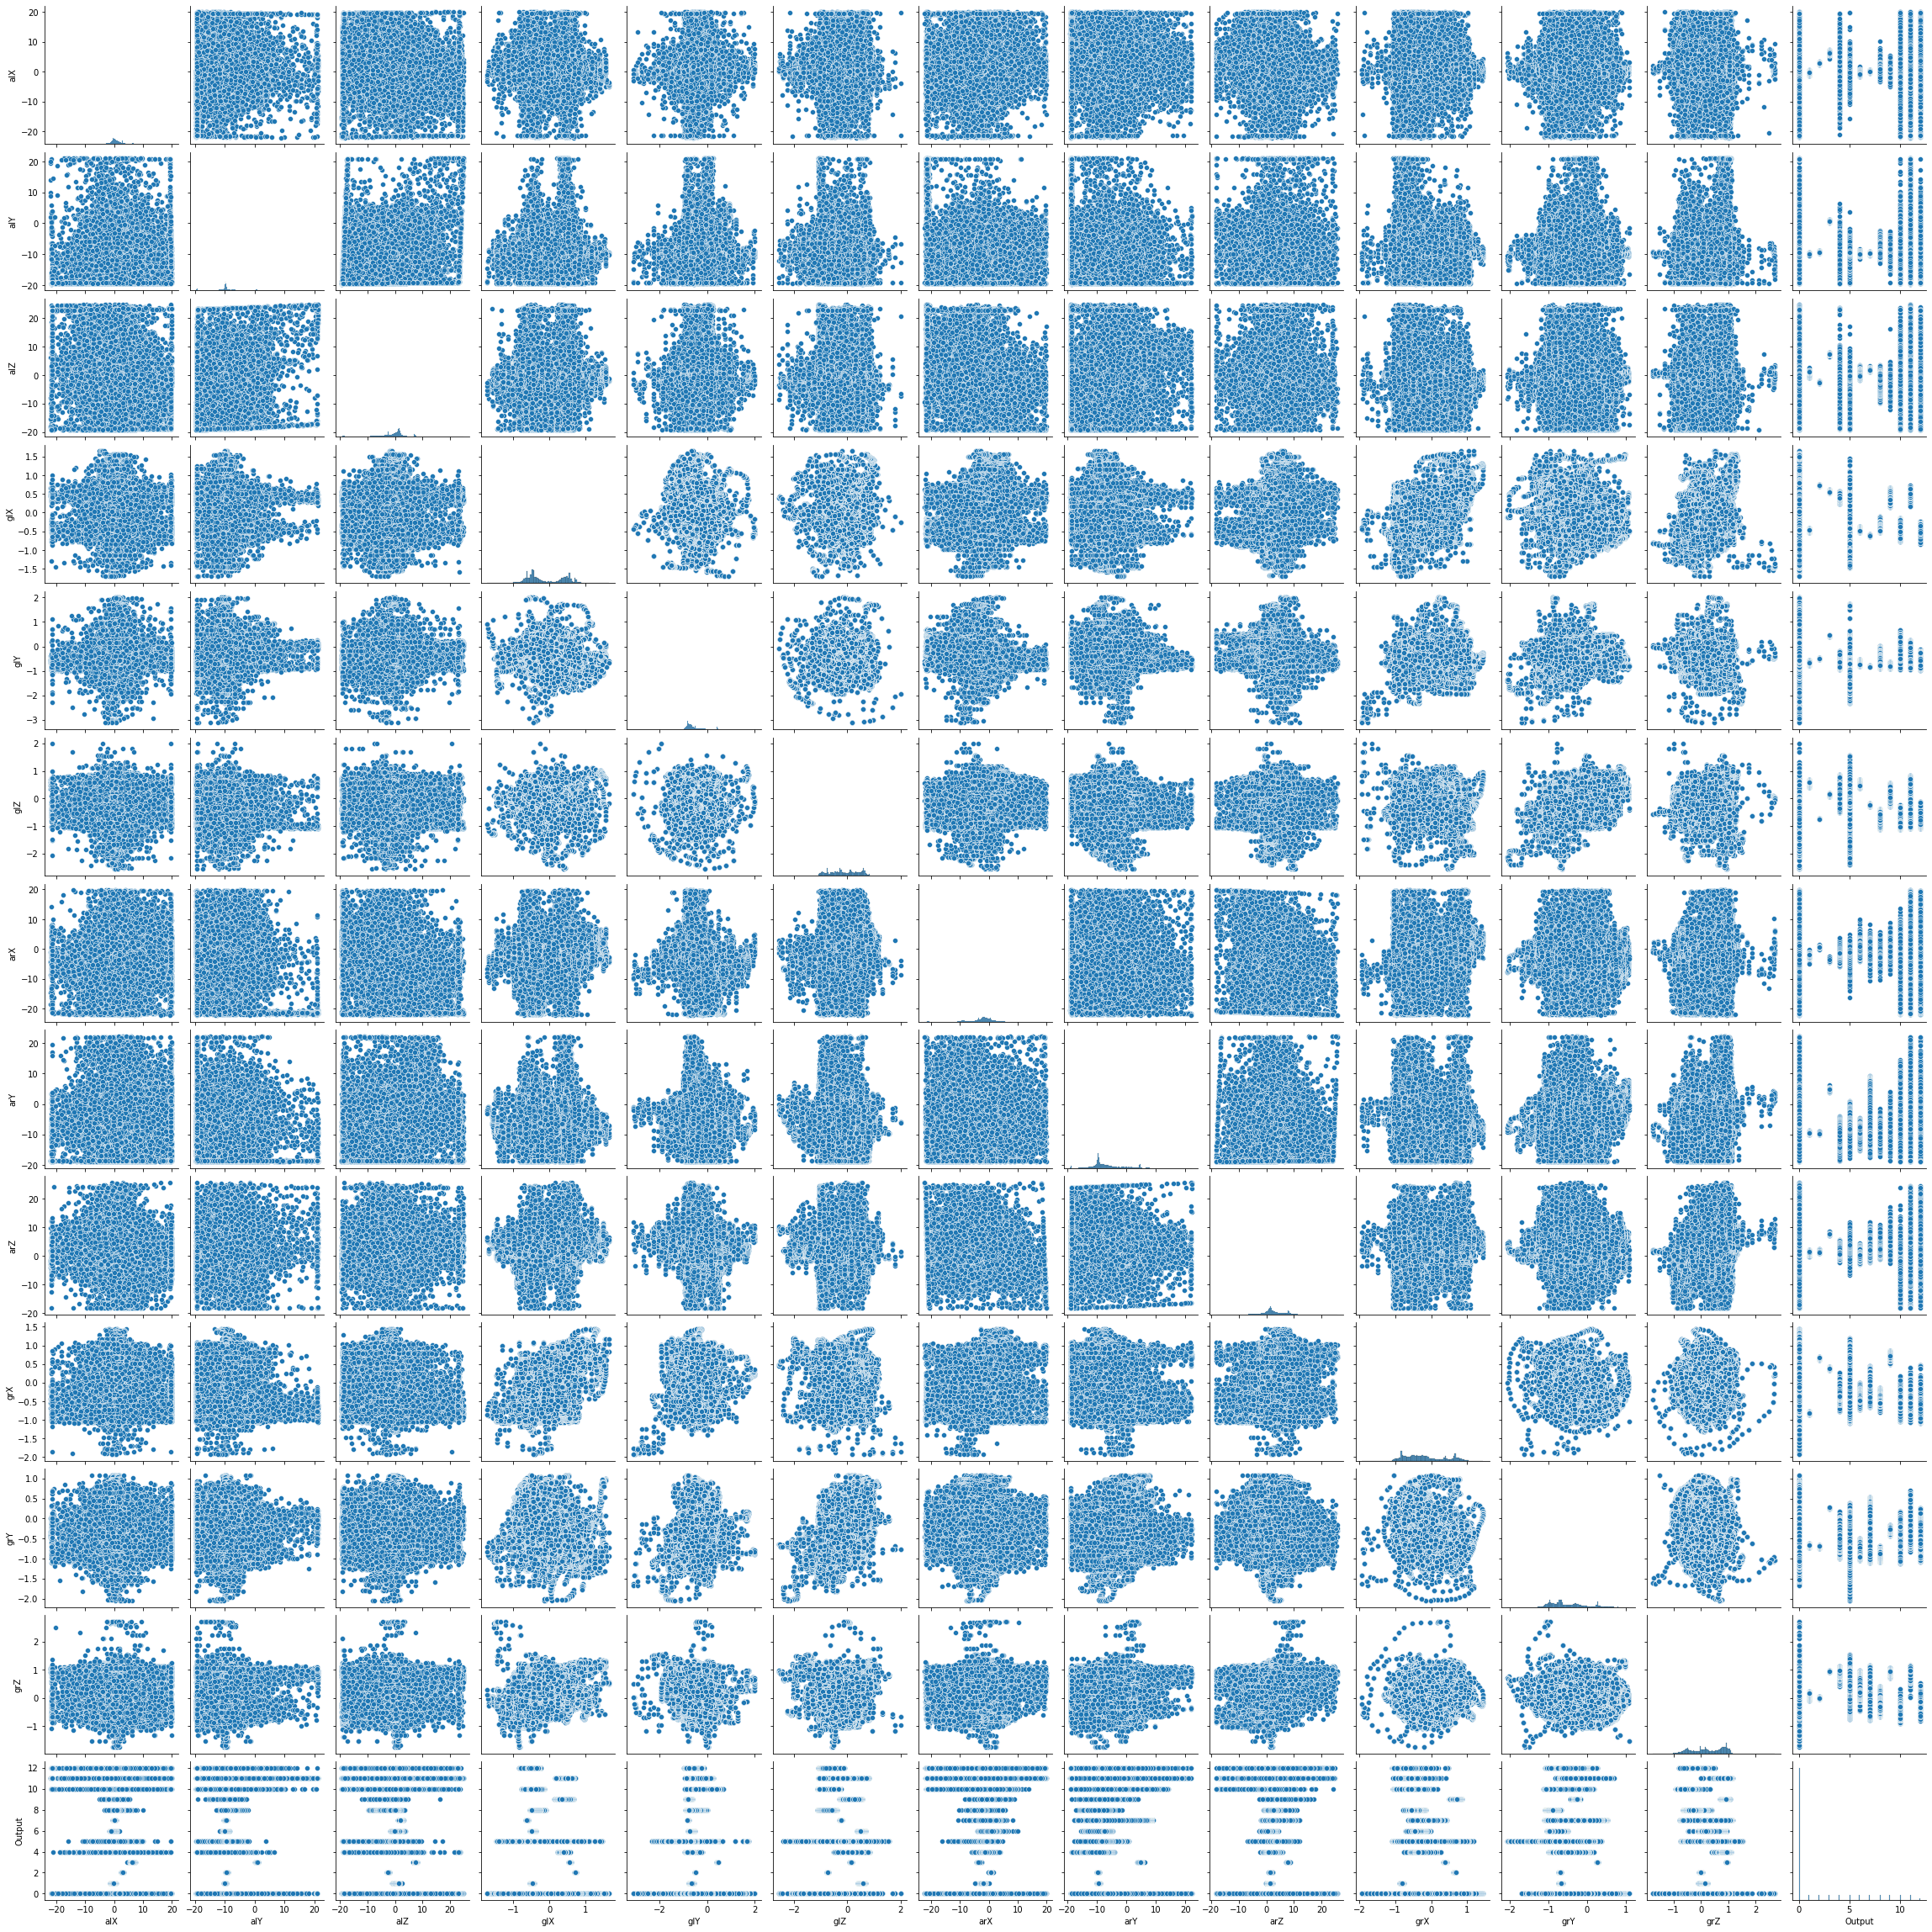

In [ ]:
sns.pairplot(mHealth)

# EDA

In [ ]:
#@title Describe MHealth Dataset One Subject
mHealth.describe().T

count      mean       std  ...      50%       75%      max
alX     122112.0  1.008831  3.653086  ...  0.50284  2.007600  20.0130
alY     122112.0 -9.682334  4.404994  ... -9.73170 -9.050700  21.0520
alZ     122112.0 -0.838356  5.606291  ...  0.29650  1.622325  24.8430
glX     122112.0 -0.094419  0.512585  ... -0.30612  0.424860   1.6494
glY     122112.0 -0.600808  0.361921  ... -0.69981 -0.508440   2.0113
glZ     122112.0 -0.127118  0.549091  ... -0.14735  0.341850   1.9941
arX     122112.0 -2.524223  5.091523  ... -1.79225  0.213825  19.8640
arY     122112.0 -6.315183  5.825658  ... -7.92870 -3.421050  22.1910
arZ     122112.0  2.710633  4.313866  ...  1.95390  5.407125  25.7350
grX     122112.0 -0.170799  0.563044  ... -0.27647  0.352940   1.4451
grY     122112.0 -0.504068  0.463206  ... -0.64066 -0.242300   1.0801
grZ     122112.0  0.256421  0.589596  ...  0.26724  0.810340   2.7069
Output  122112.0  1.792920  3.308355  ...  0.00000  2.000000  12.0000

[13 rows x 8 columns]

In [ ]:
#@title Describe MHealth for all
all = mHealth[mHealth["Output"] == 14].copy()

for i in os.listdir('MHEALTHDATASET/'):
  if not re.search('README', i):
    all = all.append(pd.read_csv('MHEALTHDATASET/'+i, header=None, sep='\t').loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]].rename(columns={5:"alX", 6:"alY", 7:"alZ", 8:"glX", 9:"glY", 10:"glZ", 14:"arX",15:"arY", 16:"arZ", 17:"grX", 18:"grY", 19:"grZ", 23:"Output"}))


description = all.describe()

description.T

count      mean       std  ...       50%       75%      max
alX     1215745.0  1.494200  3.826485  ...  1.308900  2.575800  20.0540
alY     1215745.0 -9.692878  4.171303  ... -9.670300 -9.042200  21.1610
alZ     1215745.0 -0.954806  5.461803  ... -0.016456  1.301300  25.0150
glX     1215745.0 -0.001599  0.491217  ... -0.014842  0.448980  60.4840
glY     1215745.0 -0.616632  0.354641  ... -0.707320 -0.540340   2.0113
glZ     1215745.0 -0.158781  0.546798  ... -0.190570  0.322200   2.7701
arX     1215745.0 -3.713413  4.763586  ... -2.977600 -1.193700  19.8640
arY     1215745.0 -5.805526  5.757639  ... -7.461500 -2.533900  22.1910
arZ     1215745.0  2.393880  3.876503  ...  1.928100  4.914700  25.7410
grX     1215745.0 -0.276106  0.527689  ... -0.354900  0.096078   3.3196
grY     1215745.0 -0.466434  0.555551  ... -0.634500 -0.106780   1.5565
grZ     1215745.0  0.266633  0.564380  ...  0.301720  0.778020   2.7500
Output  1215745.0  1.741465  3.283679  ...  0.000000  2.000000  12.0000

[13 rows x 8 columns]

In [ ]:
description["alX"]["max"]

20.054000000000002

# MHealth Dataset

In [ ]:
#@title Size of dataset for various subjects
for i in os.listdir('MHEALTHDATASET/'):
  if not re.search('README', i):
    print(pd.read_csv('MHEALTHDATASET/'+i, header=None, sep='\t').loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]].rename(columns={5:"alX", 6:"alY", 7:"alZ", 8:"glX", 9:"glY", 10:"glZ", 14:"arX",15:"arY", 16:"arZ", 17:"grX", 18:"grY", 19:"grZ", 23:"Output"}).shape)


(119808, 13)
(104448, 13)
(129024, 13)
(98304, 13)
(130561, 13)
(161280, 13)
(116736, 13)
(98304, 13)
(122112, 13)
(135168, 13)


In [ ]:
all.isnull().values.any()

False

In [ ]:
#@title Importing and preprocessing dataset
SAMPLES_PER_ACTIVITY=50  #@param { "type": "integer" }

Activities = [
    "Nothing",
    "Standing",
    "Sitting and Relaxing",
    "Lying Down",
    "Walking",
    "Climbing Stairs",
    "Waist bends forward",
    "Frontal Elevation of Arms",
    "Knees Bending (Crouching)",
    "Cycling",
    "Jogging",
    "Running",
    "Jump Front & Back"
    ]

Activities_subset = [4, 1, 5, 9, 10, 11, 8]
NUM_ACTIVITY=len(Activities)
X = []
Y = []

FEATURES=["alX", "alY", "alZ", "glX", "glY", "glZ", "arX", "arY", "arZ", "grX", "grY", "grZ"]
ONE_HOT_ENCODED_ACTIVITY = np.eye(NUM_ACTIVITY-1)
for i in os.listdir('MHEALTHDATASET/'):
  if not re.search('README', i):
    temp = pd.read_csv('MHEALTHDATASET/'+i, header=None, sep='\t').loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]].rename(columns={5:"alX", 6:"alY", 7:"alZ", 8:"glX", 9:"glY", 10:"glZ", 14:"arX",15:"arY", 16:"arZ", 17:"grX", 18:"grY", 19:"grZ", 23:"Output"})
    for ji,j in enumerate(Activities_subset):

        if j not in Activities_subset: continue
        output = ONE_HOT_ENCODED_ACTIVITY[ji]

        
        df =np.array(temp[temp["Output"] == j].copy())
        num_recordings = int(df.shape[0]/SAMPLES_PER_ACTIVITY)
        print(f"\tThere are {num_recordings} recordings of the {Activities[j]} activity.")
        for k in range(num_recordings):
          tensor = []
          for l in range(SAMPLES_PER_ACTIVITY):
            index = k * SAMPLES_PER_ACTIVITY + l

            tensori = []
            for m,feature in enumerate(FEATURES):
              tensori.append((df[index,m] + description[feature]["mean"]) / (description[feature]["max"] - description[feature]["min"]))
            
            tensor.append(tensori)
          X.append(tensor)
          Y.append(output)

X = np.array(X)
Y = np.array(Y)


print("Data set parsing and preparation complete.")



	There are 61 recordings of the Walking activity.
	There are 61 recordings of the Standing activity.
	There are 61 recordings of the Climbing Stairs activity.
	There are 61 recordings of the Cycling activity.
	There are 61 recordings of the Jogging activity.
	There are 61 recordings of the Running activity.
	There are 54 recordings of the Knees Bending (Crouching) activity.
	There are 61 recordings of the Walking activity.
	There are 61 recordings of the Standing activity.
	There are 61 recordings of the Climbing Stairs activity.
	There are 61 recordings of the Cycling activity.
	There are 61 recordings of the Jogging activity.
	There are 61 recordings of the Running activity.
	There are 56 recordings of the Knees Bending (Crouching) activity.
	There are 61 recordings of the Walking activity.
	There are 61 recordings of the Standing activity.
	There are 61 recordings of the Climbing Stairs activity.
	There are 61 recordings of the Cycling activity.
	There are 61 recordings of the Joggi

In [ ]:
X.min()

-0.7187807375461651

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [ ]:
input_shape=X.shape[1:]

X.shape

(4243, 50, 12)

In [ ]:
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, TimeDistributed
from keras.layers import Conv3D,Conv2D,Conv1D,MaxPooling1D, MaxPooling2D,TimeDistributed,LSTM,ConvLSTM2D, GRU
from keras.utils import np_utils

from sklearn.metrics import classification_report

# Models

## Convnet

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(32, 3, activation='relu', input_shape=input_shape))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.5))
model_cnn.add(Flatten())
model_cnn.add(Dense(1024, activation='relu'))
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dense(12, activation='softmax'))
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 48, 32)            1184      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              787456    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 12)                6

In [ ]:

model_cnn.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64

EPOCHS=40

In [ ]:
history = model_cnn.fit(X_train,
                      Y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      shuffle=True,
                      validation_split=0.3,
                      verbose=1)

Epoch 1/40
35/35 [==============================] - 2s 47ms/step - loss: 1.6281 - accuracy: 0.3743 - val_loss: 0.7611 - val_accuracy: 0.6942
Epoch 2/40
35/35 [==============================] - 1s 31ms/step - loss: 0.6681 - accuracy: 0.7182 - val_loss: 0.4299 - val_accuracy: 0.8262
Epoch 3/40
35/35 [==============================] - 1s 32ms/step - loss: 0.4641 - accuracy: 0.8228 - val_loss: 0.3783 - val_accuracy: 0.8586
Epoch 4/40
35/35 [==============================] - 1s 32ms/step - loss: 0.3434 - accuracy: 0.8628 - val_loss: 0.3539 - val_accuracy: 0.8743
Epoch 5/40
35/35 [==============================] - 1s 30ms/step - loss: 0.2958 - accuracy: 0.8964 - val_loss: 0.2750 - val_accuracy: 0.9005
Epoch 6/40
35/35 [==============================] - 1s 31ms/step - loss: 0.2640 - accuracy: 0.9004 - val_loss: 0.3161 - val_accuracy: 0.8806
Epoch 7/40
35/35 [==============================] - 1s 31ms/step - loss: 0.2889 - accuracy: 0.8850 - val_loss: 0.2231 - val_accuracy: 0.9099
Epoch 8/40
35

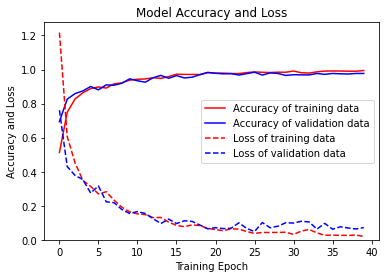

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data




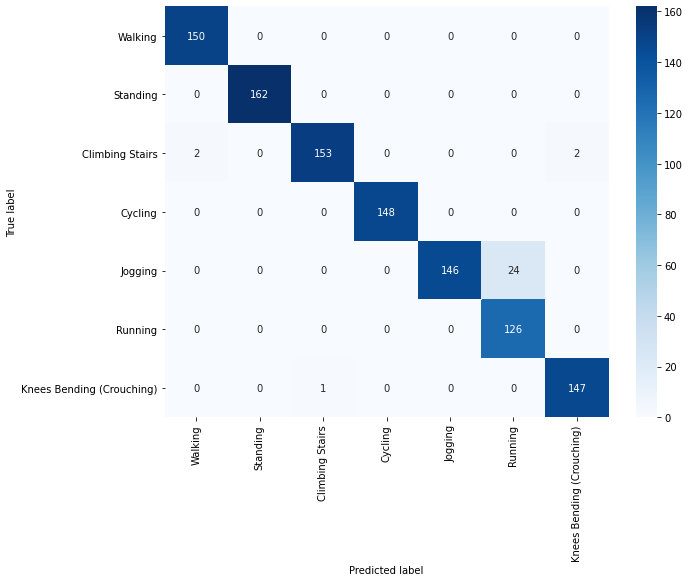

In [ ]:
predictions = model_cnn.predict(X_test)

cm = tf.math.confusion_matrix(labels=tf.argmax(Y_test,1), predictions=tf.argmax(predictions,1))
axis_labels = [Activities[i] for i in Activities_subset]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
pd.DataFrame(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)).rename(columns=dict(zip([str(i) for i in range(0,7)], list([Activities[Activities_subset[i]] for i in range(0,7)])))).T

precision    recall  f1-score      support
Walking                     0.986842  1.000000  0.993377   150.000000
Standing                    1.000000  1.000000  1.000000   162.000000
Climbing Stairs             0.993506  0.974522  0.983923   157.000000
Cycling                     1.000000  1.000000  1.000000   148.000000
Jogging                     1.000000  0.858824  0.924051   170.000000
Running                     0.840000  1.000000  0.913043   126.000000
Knees Bending (Crouching)   0.986577  0.993243  0.989899   148.000000
accuracy                    0.972667  0.972667  0.972667     0.972667
macro avg                   0.972418  0.975227  0.972042  1061.000000
weighted avg                0.976306  0.972667  0.972780  1061.000000

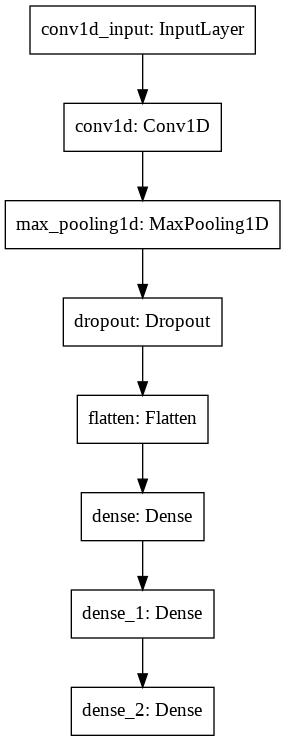

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_cnn)

## CNN-LSTM

In [ ]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(32, 3, activation='relu', input_shape=input_shape))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(Dropout(0.5))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(128))
model_cnn_lstm.add(Dense(1024, activation='relu'))
model_cnn_lstm.add(Dense(512, activation='relu'))
model_cnn_lstm.add(Dense(12, activation='softmax'))
model_cnn_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 48, 32)            1184      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 32)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               82432     
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dense_4 (Dense)              (None, 512)              

In [ ]:

model_cnn_lstm.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_cnn_lstm.fit(X_train,
                      Y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,shuffle=True,
                      validation_split=0.3,
                      verbose=1)

Epoch 1/40
35/35 [==============================] - 5s 83ms/step - loss: 1.9776 - accuracy: 0.2233 - val_loss: 1.4486 - val_accuracy: 0.2901
Epoch 2/40
35/35 [==============================] - 2s 68ms/step - loss: 1.3271 - accuracy: 0.3957 - val_loss: 0.7587 - val_accuracy: 0.7037
Epoch 3/40
35/35 [==============================] - 2s 68ms/step - loss: 0.7833 - accuracy: 0.6408 - val_loss: 0.4879 - val_accuracy: 0.7864
Epoch 4/40
35/35 [==============================] - 2s 69ms/step - loss: 0.5755 - accuracy: 0.7538 - val_loss: 0.4391 - val_accuracy: 0.8304
Epoch 5/40
35/35 [==============================] - 2s 68ms/step - loss: 0.4737 - accuracy: 0.8068 - val_loss: 0.3478 - val_accuracy: 0.8545
Epoch 6/40
35/35 [==============================] - 2s 69ms/step - loss: 0.3496 - accuracy: 0.8595 - val_loss: 0.3874 - val_accuracy: 0.8199
Epoch 7/40
35/35 [==============================] - 3s 89ms/step - loss: 0.3203 - accuracy: 0.8653 - val_loss: 0.1904 - val_accuracy: 0.9215
Epoch 8/40
35

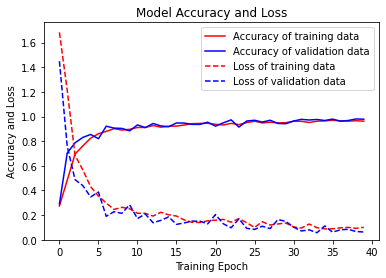

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data




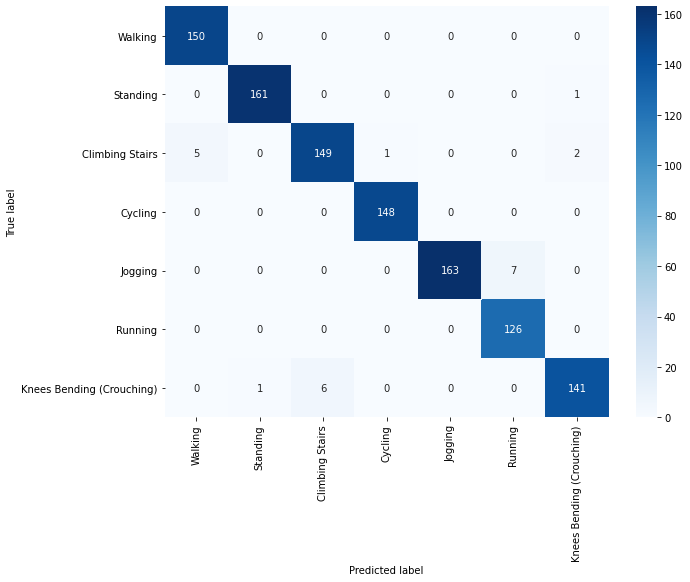

In [ ]:
predictions = model_cnn_lstm.predict(X_test)

cm = tf.math.confusion_matrix(labels=tf.argmax(Y_test,1), predictions=tf.argmax(predictions,1))
axis_labels = [Activities[i] for i in Activities_subset]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
pd.DataFrame(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)).rename(columns=dict(zip([str(i) for i in range(0,7)], list([Activities[Activities_subset[i]] for i in range(0,7)])))).T

precision    recall  f1-score      support
Walking                     0.967742  1.000000  0.983607   150.000000
Standing                    0.993827  0.993827  0.993827   162.000000
Climbing Stairs             0.961290  0.949045  0.955128   157.000000
Cycling                     0.993289  1.000000  0.996633   148.000000
Jogging                     1.000000  0.958824  0.978979   170.000000
Running                     0.947368  1.000000  0.972973   126.000000
Knees Bending (Crouching)   0.979167  0.952703  0.965753   148.000000
accuracy                    0.978322  0.978322  0.978322     0.978322
macro avg                   0.977526  0.979200  0.978129  1061.000000
weighted avg                0.978676  0.978322  0.978276  1061.000000

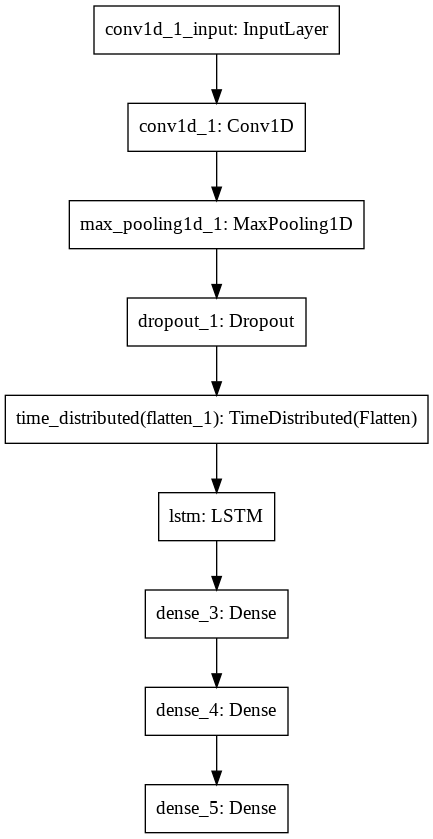

In [ ]:
plot_model(model_cnn_lstm)

## LSTM-CNN

In [ ]:
model_lstm_cnn = Sequential()

model_lstm_cnn.add(LSTM(128, input_shape=input_shape))
model_lstm_cnn.add(Reshape((-1,1)))
model_lstm_cnn.add(Conv1D(32, 3, activation='relu'))
model_lstm_cnn.add(MaxPooling1D(pool_size=2))
model_lstm_cnn.add(Dropout(0.5))
model_lstm_cnn.add(Flatten())

model_lstm_cnn.add(Dense(1024, activation='relu'))
model_lstm_cnn.add(Dense(512, activation='relu'))
model_lstm_cnn.add(Dense(12, activation='softmax'))
model_lstm_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               72192     
_________________________________________________________________
reshape (Reshape)            (None, 128, 1)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 126, 32)           128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 63, 32)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 63, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2016)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)             

In [ ]:

model_lstm_cnn.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_lstm_cnn.fit(X_train,
                      Y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,shuffle=True,
                      validation_split=0.3,
                      verbose=1)

Epoch 1/40
35/35 [==============================] - 7s 160ms/step - loss: 2.0086 - accuracy: 0.2155 - val_loss: 1.1582 - val_accuracy: 0.4681
Epoch 2/40
35/35 [==============================] - 5s 148ms/step - loss: 1.0410 - accuracy: 0.5366 - val_loss: 0.7739 - val_accuracy: 0.6984
Epoch 3/40
35/35 [==============================] - 5s 148ms/step - loss: 0.7289 - accuracy: 0.6949 - val_loss: 0.5545 - val_accuracy: 0.7916
Epoch 4/40
35/35 [==============================] - 5s 150ms/step - loss: 0.5839 - accuracy: 0.7664 - val_loss: 0.4993 - val_accuracy: 0.8157
Epoch 5/40
35/35 [==============================] - 5s 149ms/step - loss: 0.5862 - accuracy: 0.7720 - val_loss: 0.4733 - val_accuracy: 0.7916
Epoch 6/40
35/35 [==============================] - 5s 150ms/step - loss: 0.5272 - accuracy: 0.7847 - val_loss: 0.4087 - val_accuracy: 0.8450
Epoch 7/40
35/35 [==============================] - 6s 172ms/step - loss: 0.4270 - accuracy: 0.8300 - val_loss: 0.3636 - val_accuracy: 0.8565
Epoch 

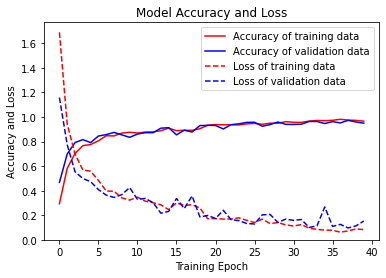

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data




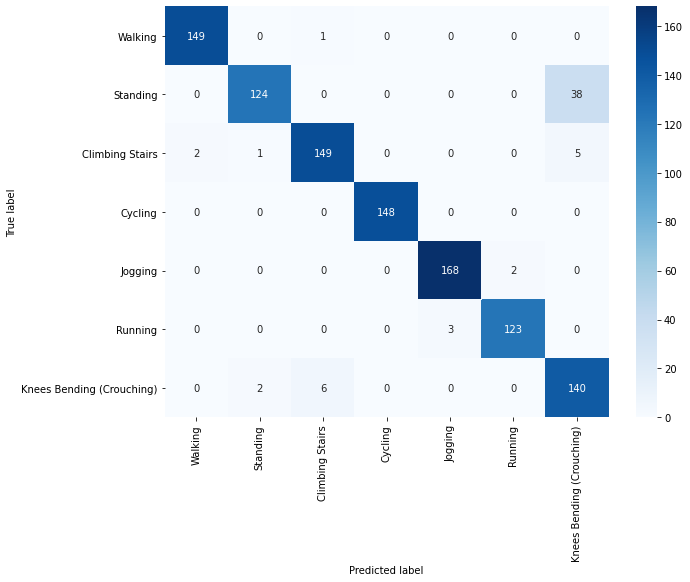

In [ ]:
predictions = model_lstm_cnn.predict(X_test)

cm = tf.math.confusion_matrix(labels=tf.argmax(Y_test,1), predictions=tf.argmax(predictions,1))
axis_labels = [Activities[i] for i in Activities_subset]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
pd.DataFrame(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)).rename(columns=dict(zip([str(i) for i in range(0,7)], list([Activities[Activities_subset[i]] for i in range(0,7)])))).T

precision    recall  f1-score     support
Walking                     0.986755  0.993333  0.990033   150.00000
Standing                    0.976378  0.765432  0.858131   162.00000
Climbing Stairs             0.955128  0.949045  0.952077   157.00000
Cycling                     1.000000  1.000000  1.000000   148.00000
Jogging                     0.982456  0.988235  0.985337   170.00000
Running                     0.984000  0.976190  0.980080   126.00000
Knees Bending (Crouching)   0.765027  0.945946  0.845921   148.00000
accuracy                    0.943450  0.943450  0.943450     0.94345
macro avg                   0.949964  0.945455  0.944511  1061.00000
weighted avg                0.950393  0.943450  0.943631  1061.00000

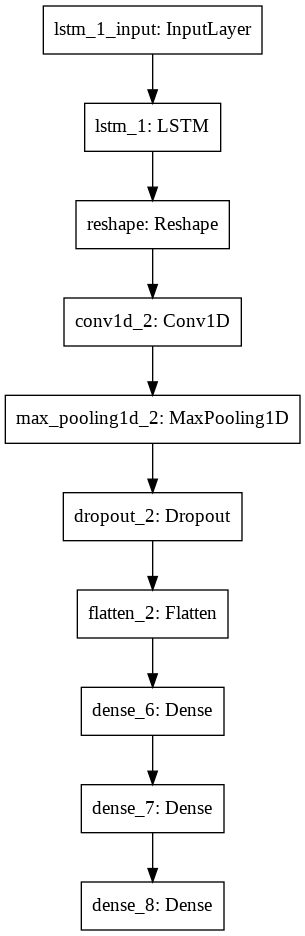

In [ ]:
plot_model(model_lstm_cnn)

## LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=input_shape))
model_lstm.add(Dense(12, activation='softmax'))
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               72192     
_________________________________________________________________
dense_9 (Dense)              (None, 12)                1548      
Total params: 73,740
Trainable params: 73,740
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model_lstm.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model_lstm.fit(X_train,
                      Y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,shuffle=True,
                      validation_split=0.3,
                      verbose=1)

Epoch 1/40
35/35 [==============================] - 5s 107ms/step - loss: 2.1672 - accuracy: 0.2479 - val_loss: 1.3667 - val_accuracy: 0.3550
Epoch 2/40
35/35 [==============================] - 3s 92ms/step - loss: 1.3508 - accuracy: 0.4010 - val_loss: 1.1062 - val_accuracy: 0.5403
Epoch 3/40
35/35 [==============================] - 3s 96ms/step - loss: 1.0191 - accuracy: 0.5518 - val_loss: 0.9583 - val_accuracy: 0.5466
Epoch 4/40
35/35 [==============================] - 3s 92ms/step - loss: 0.9246 - accuracy: 0.6233 - val_loss: 0.8161 - val_accuracy: 0.7152
Epoch 5/40
35/35 [==============================] - 3s 92ms/step - loss: 0.8500 - accuracy: 0.6844 - val_loss: 0.7849 - val_accuracy: 0.7246
Epoch 6/40
35/35 [==============================] - 3s 92ms/step - loss: 0.7423 - accuracy: 0.7046 - val_loss: 0.7569 - val_accuracy: 0.7257
Epoch 7/40
35/35 [==============================] - 3s 94ms/step - loss: 0.7349 - accuracy: 0.7093 - val_loss: 0.6277 - val_accuracy: 0.7529
Epoch 8/40
3

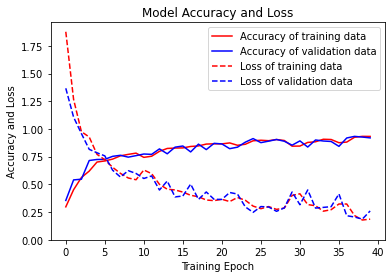

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data




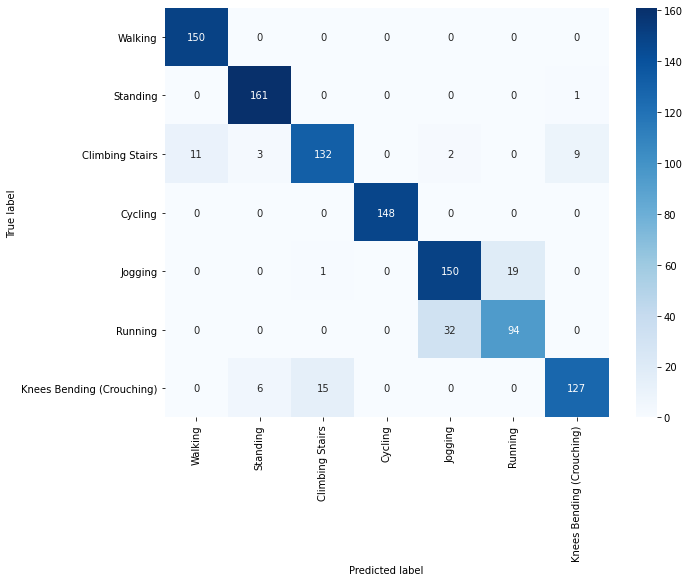

In [ ]:
predictions = model_lstm.predict(X_test)

cm = tf.math.confusion_matrix(labels=tf.argmax(Y_test,1), predictions=tf.argmax(predictions,1))
axis_labels = [Activities[i] for i in Activities_subset]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
pd.DataFrame(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)).rename(columns=dict(zip([str(i) for i in range(0,7)], list([Activities[Activities_subset[i]] for i in range(0,7)])))).T

precision    recall  f1-score      support
Walking                     0.931677  1.000000  0.964630   150.000000
Standing                    0.947059  0.993827  0.969880   162.000000
Climbing Stairs             0.891892  0.840764  0.865574   157.000000
Cycling                     1.000000  1.000000  1.000000   148.000000
Jogging                     0.815217  0.882353  0.847458   170.000000
Running                     0.831858  0.746032  0.786611   126.000000
Knees Bending (Crouching)   0.927007  0.858108  0.891228   148.000000
accuracy                    0.906692  0.906692  0.906692     0.906692
macro avg                   0.906387  0.903012  0.903626  1061.000000
weighted avg                0.906504  0.906692  0.905554  1061.000000

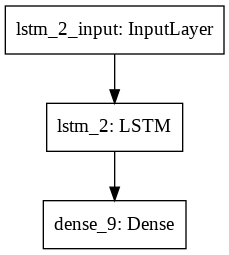

In [ ]:
plot_model(model_lstm)

## CNN-GRU

In [ ]:
model_cnn_gru = Sequential()
model_cnn_gru.add(Conv1D(32, 3, activation='relu', input_shape=input_shape))
model_cnn_gru.add(MaxPooling1D(pool_size=2))
model_cnn_gru.add(Dropout(0.5))
model_cnn_gru.add(TimeDistributed(Flatten()))
model_cnn_gru.add(GRU(128))
model_cnn_gru.add(Dense(1024, activation='relu'))
model_cnn_gru.add(Dense(512, activation='relu'))
model_cnn_gru.add(Dense(12, activation='softmax'))
model_cnn_gru.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 48, 32)            1184      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 32)            0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 24, 32)            0         
_________________________________________________________________
gru (GRU)                    (None, 128)               62208     
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              132096    
_________________________________________________________________
dense_11 (Dense)             (None, 512)              

In [ ]:

model_cnn_gru.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_cnn_gru.fit(X_train,
                      Y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,shuffle=True,
                      validation_split=0.3,
                      verbose=1)

Epoch 1/40
35/35 [==============================] - 4s 71ms/step - loss: 2.0351 - accuracy: 0.2516 - val_loss: 1.1445 - val_accuracy: 0.5162
Epoch 2/40
35/35 [==============================] - 2s 58ms/step - loss: 1.0731 - accuracy: 0.5415 - val_loss: 0.6802 - val_accuracy: 0.7257
Epoch 3/40
35/35 [==============================] - 2s 58ms/step - loss: 0.6953 - accuracy: 0.7079 - val_loss: 0.4968 - val_accuracy: 0.7864
Epoch 4/40
35/35 [==============================] - 2s 58ms/step - loss: 0.5208 - accuracy: 0.7663 - val_loss: 0.3578 - val_accuracy: 0.8262
Epoch 5/40
35/35 [==============================] - 2s 58ms/step - loss: 0.3872 - accuracy: 0.8339 - val_loss: 0.3316 - val_accuracy: 0.8712
Epoch 6/40
35/35 [==============================] - 2s 57ms/step - loss: 0.3440 - accuracy: 0.8559 - val_loss: 0.3236 - val_accuracy: 0.8639
Epoch 7/40
35/35 [==============================] - 2s 58ms/step - loss: 0.3492 - accuracy: 0.8559 - val_loss: 0.3435 - val_accuracy: 0.8660
Epoch 8/40
35

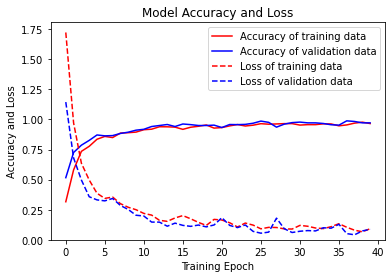

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data




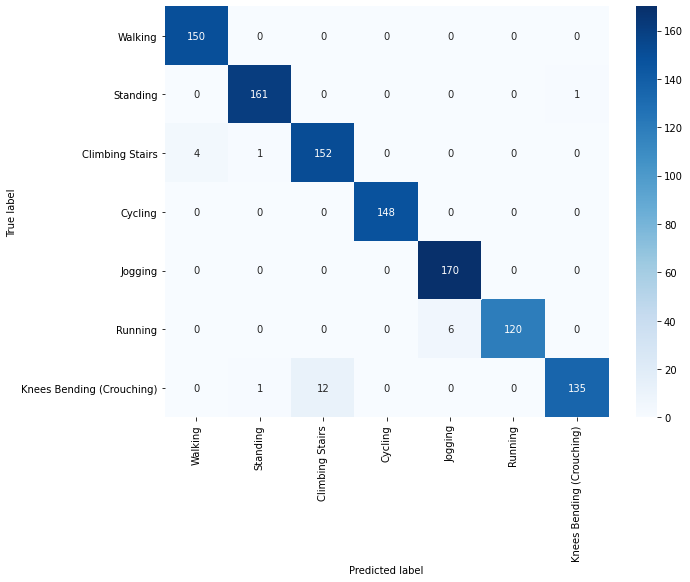

In [ ]:
predictions = model_cnn_gru.predict(X_test)

cm = tf.math.confusion_matrix(labels=tf.argmax(Y_test,1), predictions=tf.argmax(predictions,1))
axis_labels = [Activities[i] for i in Activities_subset]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
pd.DataFrame(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)).rename(columns=dict(zip([str(i) for i in range(0,7)], list([Activities[Activities_subset[i]] for i in range(0,7)])))).T

precision    recall  f1-score      support
Walking                     0.974026  1.000000  0.986842   150.000000
Standing                    0.987730  0.993827  0.990769   162.000000
Climbing Stairs             0.926829  0.968153  0.947040   157.000000
Cycling                     1.000000  1.000000  1.000000   148.000000
Jogging                     0.965909  1.000000  0.982659   170.000000
Running                     1.000000  0.952381  0.975610   126.000000
Knees Bending (Crouching)   0.992647  0.912162  0.950704   148.000000
accuracy                    0.976437  0.976437  0.976437     0.976437
macro avg                   0.978163  0.975218  0.976232  1061.000000
weighted avg                0.977139  0.976437  0.976342  1061.000000

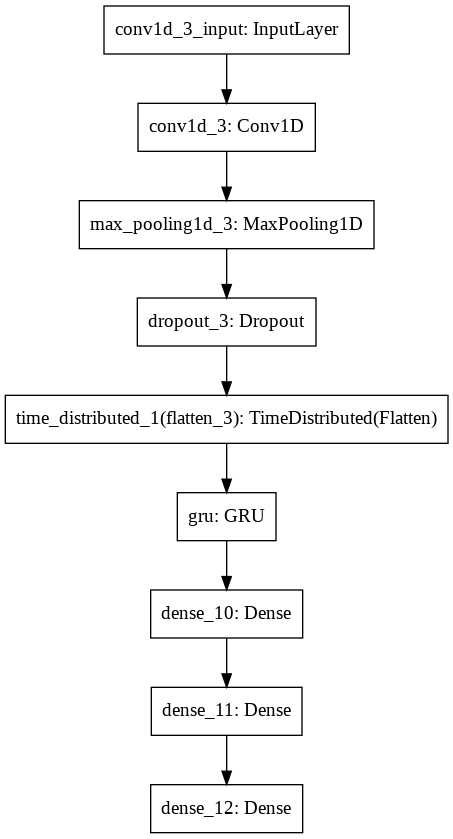

In [ ]:
plot_model(model_cnn_gru)

## GRU-CNN

In [ ]:
model_gru_cnn = Sequential()
model_gru_cnn.add(GRU(128, input_shape=input_shape))
model_gru_cnn.add(Reshape((-1,1)))
model_gru_cnn.add(Conv1D(32, 3, activation='relu'))
model_gru_cnn.add(MaxPooling1D(pool_size=2))
model_gru_cnn.add(Dropout(0.5))
model_gru_cnn.add(Flatten())
model_gru_cnn.add(Dense(1024, activation='relu'))
model_gru_cnn.add(Dense(512, activation='relu'))
model_gru_cnn.add(Dense(12, activation='softmax'))
model_gru_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               54528     
_________________________________________________________________
reshape_1 (Reshape)          (None, 128, 1)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 126, 32)           128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 63, 32)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 32)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2016)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)             

In [ ]:

model_gru_cnn.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_gru_cnn.fit(X_train,
                      Y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,shuffle=True,
                      validation_split=0.3,
                      verbose=1)

Epoch 1/40
35/35 [==============================] - 8s 149ms/step - loss: 2.0145 - accuracy: 0.2361 - val_loss: 1.0159 - val_accuracy: 0.5592
Epoch 2/40
35/35 [==============================] - 5s 134ms/step - loss: 0.9424 - accuracy: 0.5892 - val_loss: 0.7990 - val_accuracy: 0.6743
Epoch 3/40
35/35 [==============================] - 5s 130ms/step - loss: 0.7456 - accuracy: 0.6687 - val_loss: 0.6762 - val_accuracy: 0.7623
Epoch 4/40
35/35 [==============================] - 5s 130ms/step - loss: 0.6112 - accuracy: 0.7374 - val_loss: 0.5456 - val_accuracy: 0.7885
Epoch 5/40
35/35 [==============================] - 5s 129ms/step - loss: 0.5155 - accuracy: 0.7684 - val_loss: 0.4542 - val_accuracy: 0.8021
Epoch 6/40
35/35 [==============================] - 5s 132ms/step - loss: 0.5326 - accuracy: 0.7792 - val_loss: 0.3995 - val_accuracy: 0.8398
Epoch 7/40
35/35 [==============================] - 5s 129ms/step - loss: 0.4577 - accuracy: 0.8226 - val_loss: 0.3917 - val_accuracy: 0.8419
Epoch 

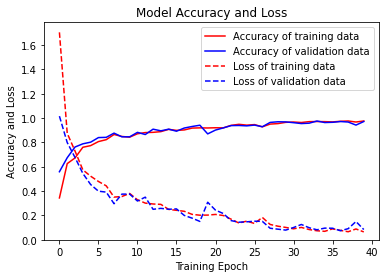

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data




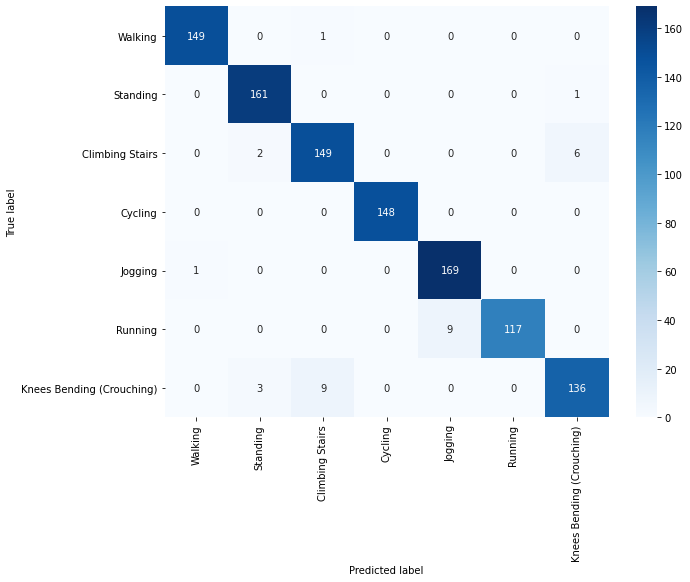

In [ ]:
predictions = model_gru_cnn.predict(X_test)

cm = tf.math.confusion_matrix(labels=tf.argmax(Y_test,1), predictions=tf.argmax(predictions,1))
axis_labels = [Activities[i] for i in Activities_subset]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
pd.DataFrame(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)).rename(columns=dict(zip([str(i) for i in range(0,7)], list([Activities[Activities_subset[i]] for i in range(0,7)])))).T

precision    recall  f1-score     support
Walking                     0.993333  0.993333  0.993333   150.00000
Standing                    0.969880  0.993827  0.981707   162.00000
Climbing Stairs             0.937107  0.949045  0.943038   157.00000
Cycling                     1.000000  1.000000  1.000000   148.00000
Jogging                     0.949438  0.994118  0.971264   170.00000
Running                     1.000000  0.928571  0.962963   126.00000
Knees Bending (Crouching)   0.951049  0.918919  0.934708   148.00000
accuracy                    0.969840  0.969840  0.969840     0.96984
macro avg                   0.971544  0.968259  0.969573  1061.00000
weighted avg                0.970222  0.969840  0.969725  1061.00000

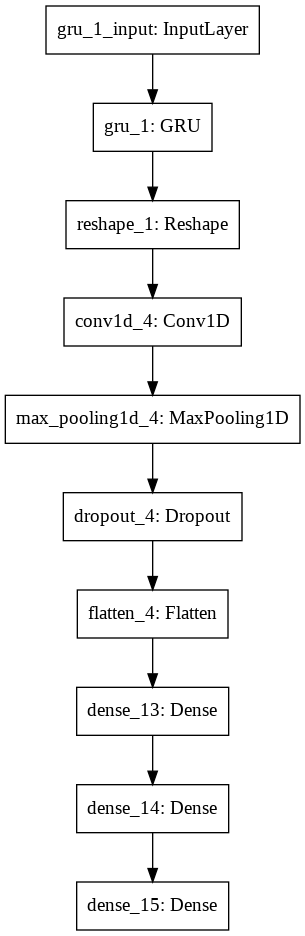

In [ ]:
plot_model(model_gru_cnn)

## GRU

In [ ]:
model_gru = Sequential()
model_gru.add(GRU(128, input_shape=input_shape))
model_gru.add(Dense(12, activation='softmax'))
model_gru.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 128)               54528     
_________________________________________________________________
dense_16 (Dense)             (None, 12)                1548      
Total params: 56,076
Trainable params: 56,076
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model_gru.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_gru.fit(X_train,
                      Y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,shuffle=True,
                      validation_split=0.3,
                      verbose=1)

Epoch 1/40
35/35 [==============================] - 5s 89ms/step - loss: 2.2633 - accuracy: 0.1770 - val_loss: 1.8526 - val_accuracy: 0.4785
Epoch 2/40
35/35 [==============================] - 3s 77ms/step - loss: 1.7834 - accuracy: 0.3536 - val_loss: 1.5378 - val_accuracy: 0.4963
Epoch 3/40
35/35 [==============================] - 3s 77ms/step - loss: 1.4862 - accuracy: 0.4137 - val_loss: 1.3396 - val_accuracy: 0.4796
Epoch 4/40
35/35 [==============================] - 3s 75ms/step - loss: 1.3408 - accuracy: 0.4445 - val_loss: 1.2814 - val_accuracy: 0.4911
Epoch 5/40
35/35 [==============================] - 3s 76ms/step - loss: 1.2673 - accuracy: 0.5229 - val_loss: 1.1410 - val_accuracy: 0.5665
Epoch 6/40
35/35 [==============================] - 3s 75ms/step - loss: 1.0967 - accuracy: 0.5743 - val_loss: 0.9756 - val_accuracy: 0.5686
Epoch 7/40
35/35 [==============================] - 3s 92ms/step - loss: 0.9388 - accuracy: 0.6159 - val_loss: 0.8540 - val_accuracy: 0.6513
Epoch 8/40
35

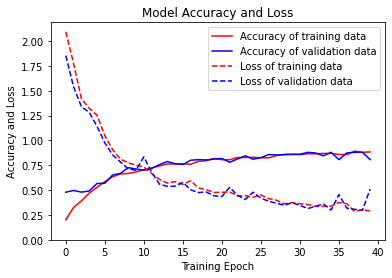

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data




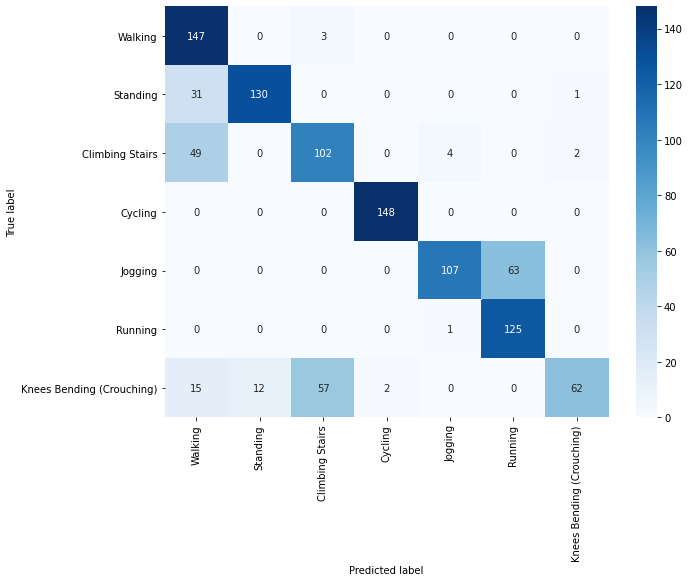

In [ ]:
predictions = model_gru.predict(X_test)

cm = tf.math.confusion_matrix(labels=tf.argmax(Y_test,1), predictions=tf.argmax(predictions,1))
axis_labels = [Activities[i] for i in Activities_subset]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
pd.DataFrame(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)).rename(columns=dict(zip([str(i) for i in range(0,7)], list([Activities[Activities_subset[i]] for i in range(0,7)])))).T

precision    recall  f1-score      support
Walking                     0.607438  0.980000  0.750000   150.000000
Standing                    0.915493  0.802469  0.855263   162.000000
Climbing Stairs             0.629630  0.649682  0.639498   157.000000
Cycling                     0.986667  1.000000  0.993289   148.000000
Jogging                     0.955357  0.629412  0.758865   170.000000
Running                     0.664894  0.992063  0.796178   126.000000
Knees Bending (Crouching)   0.953846  0.418919  0.582160   148.000000
accuracy                    0.773798  0.773798  0.773798     0.773798
macro avg                   0.816189  0.781792  0.767893  1061.000000
weighted avg                0.821546  0.773798  0.767150  1061.000000

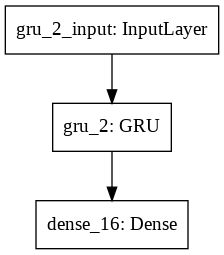

In [ ]:
plot_model(model_gru) 

## Ensemble of Models

In [ ]:
model_cnn.trainable = False

model_cnn_lstm.trainable = False

model_lstm_cnn.trainable = False

model_lstm.trainable = False

model_cnn_gru.trainable = False

model_gru_cnn.trainable = False

model_gru.trainable = False



In [ ]:
from tensorflow.keras.layers import concatenate

In [ ]:
model_input = Input(input_shape)
x1 = model_cnn(model_input)
x2 = model_cnn_lstm(model_input)
x3 = model_lstm_cnn(model_input)
x4 = model_lstm(model_input)
x5 = model_cnn_gru(model_input)
x6 = model_gru_cnn(model_input)
x7 = model_gru(model_input)
x = concatenate([x1,x2,x3,x4,x5,x6,x7])
output = Dense(12, activation='softmax')(x)

In [ ]:
model = Model(model_input, output, name='ensemble')

In [ ]:

model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

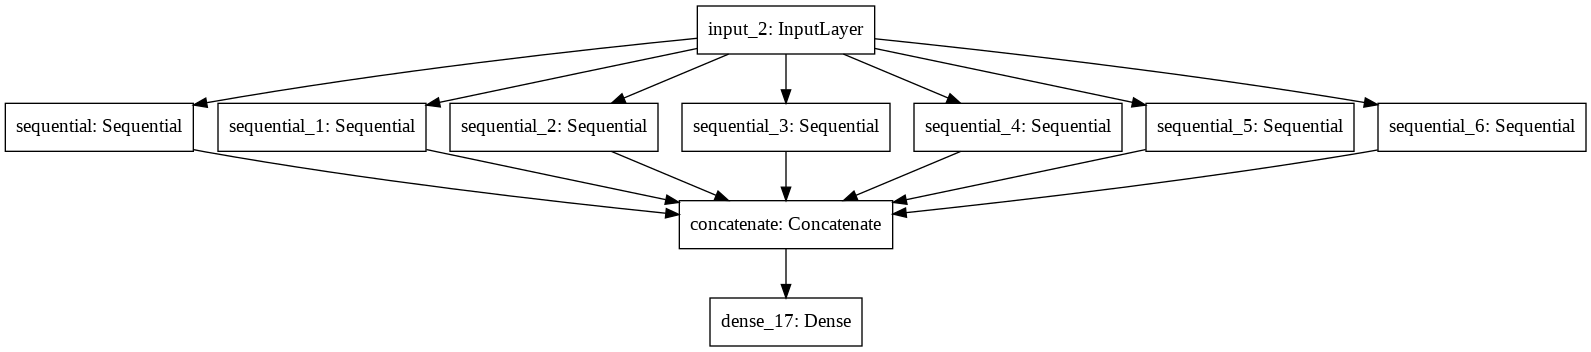

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

In [ ]:
history = model.fit(X_train,
                      Y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,shuffle=True,
                      validation_split=0.3,
                      verbose=1)

Epoch 1/40
35/35 [==============================] - 18s 275ms/step - loss: 2.3635 - accuracy: 0.2341 - val_loss: 2.0758 - val_accuracy: 0.5152
Epoch 2/40
35/35 [==============================] - 7s 189ms/step - loss: 1.9687 - accuracy: 0.5668 - val_loss: 1.7033 - val_accuracy: 0.7948
Epoch 3/40
35/35 [==============================] - 7s 211ms/step - loss: 1.6112 - accuracy: 0.8153 - val_loss: 1.3787 - val_accuracy: 0.8209
Epoch 4/40
35/35 [==============================] - 7s 196ms/step - loss: 1.2942 - accuracy: 0.9122 - val_loss: 1.1049 - val_accuracy: 0.9832
Epoch 5/40
35/35 [==============================] - 7s 193ms/step - loss: 1.0243 - accuracy: 0.9900 - val_loss: 0.8828 - val_accuracy: 0.9853
Epoch 6/40
35/35 [==============================] - 7s 191ms/step - loss: 0.8213 - accuracy: 0.9960 - val_loss: 0.7078 - val_accuracy: 0.9874
Epoch 7/40
35/35 [==============================] - 7s 189ms/step - loss: 0.6547 - accuracy: 0.9958 - val_loss: 0.5742 - val_accuracy: 0.9874
Epoch

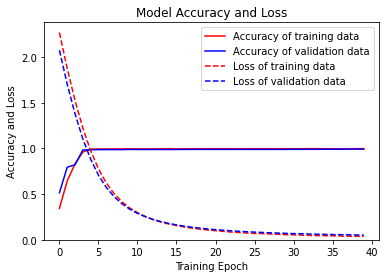

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


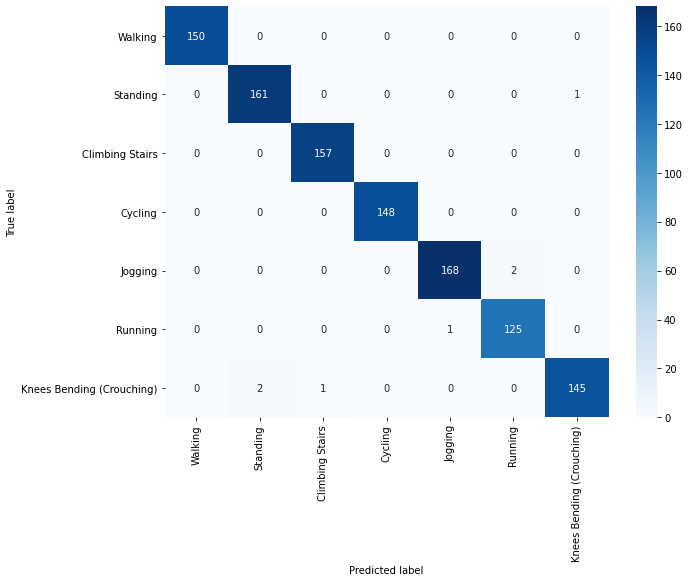

In [ ]:
predictions = model.predict(X_test)

cm = tf.math.confusion_matrix(labels=tf.argmax(Y_test,1), predictions=tf.argmax(predictions,1))
axis_labels = [Activities[i] for i in Activities_subset]
figure = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
pd.DataFrame(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)).rename(columns=dict(zip([str(i) for i in range(0,7)], list([Activities[Activities_subset[i]] for i in range(0,7)])))).T

precision    recall  f1-score      support
Walking                     1.000000  1.000000  1.000000   150.000000
Standing                    0.987730  0.993827  0.990769   162.000000
Climbing Stairs             0.993671  1.000000  0.996825   157.000000
Cycling                     1.000000  1.000000  1.000000   148.000000
Jogging                     0.994083  0.988235  0.991150   170.000000
Running                     0.984252  0.992063  0.988142   126.000000
Knees Bending (Crouching)   0.993151  0.979730  0.986395   148.000000
accuracy                    0.993402  0.993402  0.993402     0.993402
macro avg                   0.993269  0.993408  0.993326  1061.000000
weighted avg                0.993416  0.993402  0.993397  1061.000000

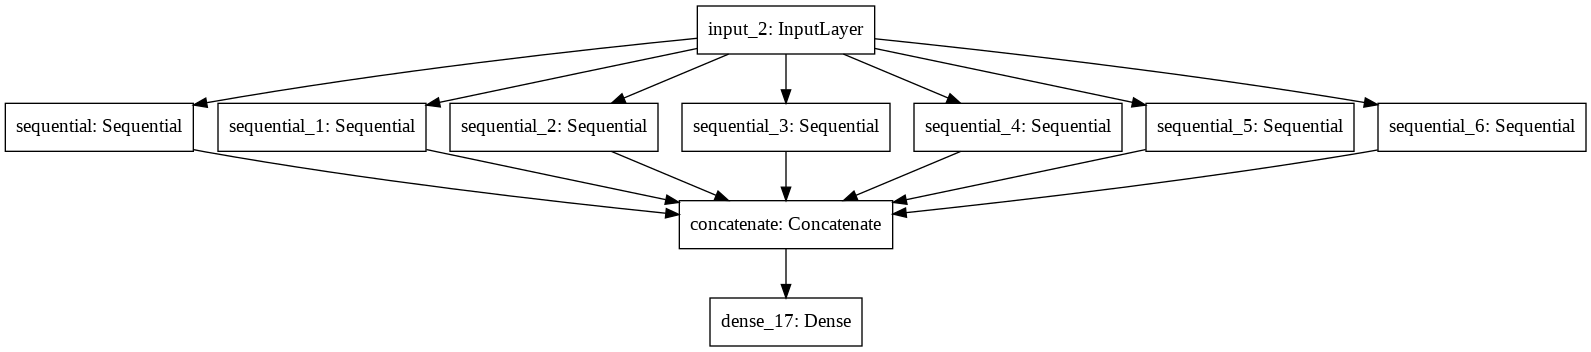

In [ ]:
plot_model(model) 